In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blue: 0.4974
	2. four: 0.4906
	3. <pad>: 0.3582
	4. red: 0.3159
	5. round: 0.1608
	6. angle: 0.1070
	7. has: 0.0811
	8. is: 0.0712
	9. this: 0.0618
	10. color: 0.0419

Top-n images with largest absolute values of logits:


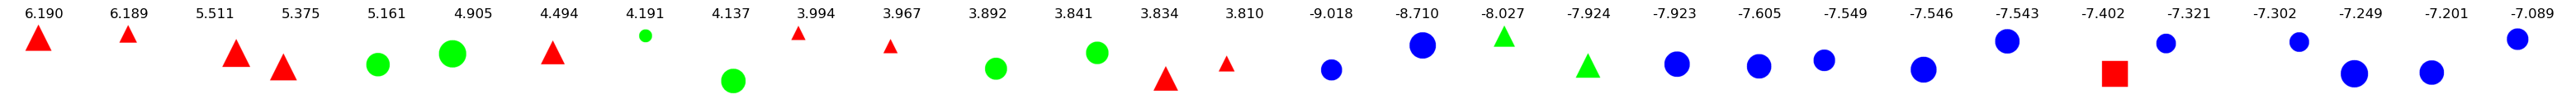

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. <pad>: 0.3740
	2. four: 0.3318
	3. red: 0.2941
	4. green: 0.2880
	5. blue: 0.2140
	6. is: 0.2079
	7. has: 0.1688
	8. angle: 0.0923
	9. round: 0.0870
	10. color: 0.0548

Top-n images with largest absolute values of logits:


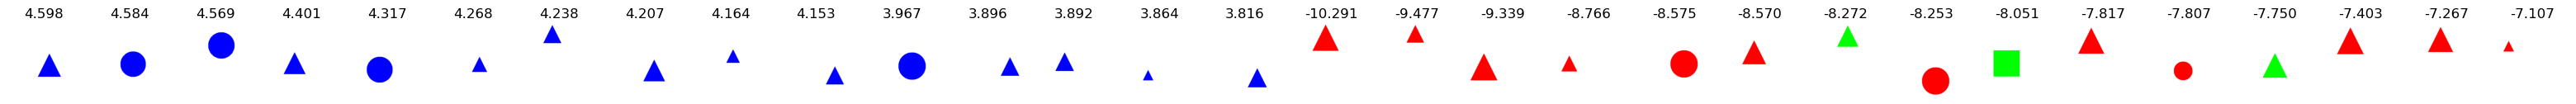

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.3482
	2. green: 0.3023
	3. angle: 0.3019
	4. <pad>: 0.2417
	5. three: 0.2158
	6. four: 0.1636
	7. has: 0.1221
	8. round: 0.0998
	9. red: 0.0840
	10. is: 0.0718

Top-n images with largest absolute values of logits:


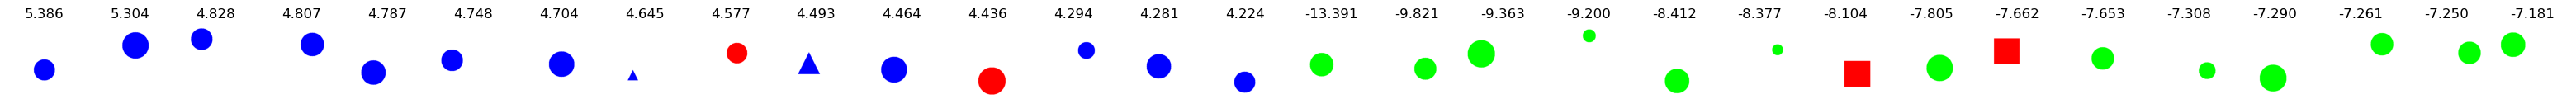

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. this: 0.2218
	2. three: 0.1723
	3. is: 0.1701
	4. shape: 0.1295
	5. round: 0.1204
	6. color: 0.1111
	7. red: 0.1098
	8. canvas: 0.0915
	9. has: 0.0840
	10. blank: 0.0737

Top-n images with largest absolute values of logits:


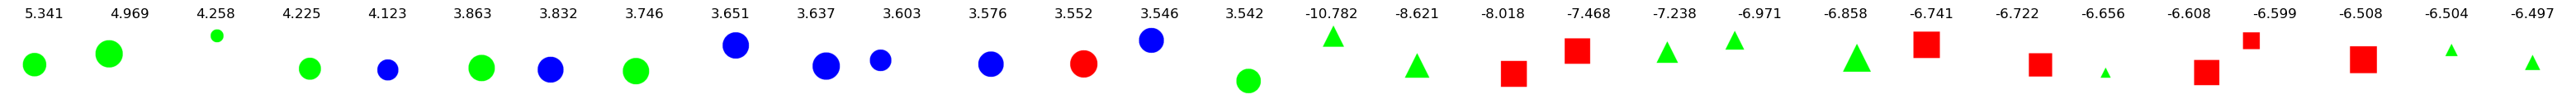

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. four: 0.3488
	2. <pad>: 0.3395
	3. green: 0.3387
	4. red: 0.3377
	5. has: 0.1715
	6. this: 0.1237
	7. shape: 0.1112
	8. is: 0.0777
	9. round: 0.0638
	10. angle: 0.0480

Top-n images with largest absolute values of logits:


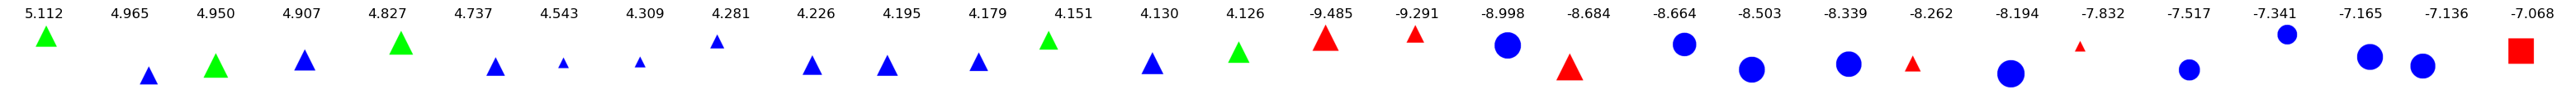

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. four: 0.3819
	2. <pad>: 0.3785
	3. green: 0.3633
	4. red: 0.3176
	5. round: 0.1639
	6. has: 0.1597
	7. blue: 0.1374
	8. angle: 0.0930
	9. is: 0.0769
	10. three: 0.0593

Top-n images with largest absolute values of logits:


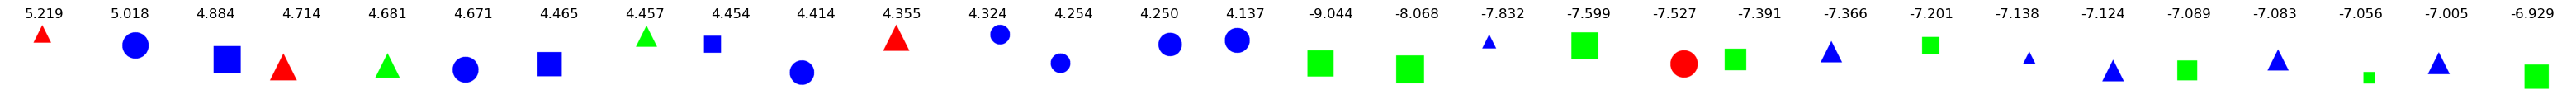

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. four: 0.5086
	2. <pad>: 0.4840
	3. red: 0.4542
	4. blue: 0.2503
	5. has: 0.1424
	6. this: 0.0833
	7. angle: 0.0608
	8. shape: 0.0597
	9. is: 0.0528
	10. color: 0.0436

Top-n images with largest absolute values of logits:


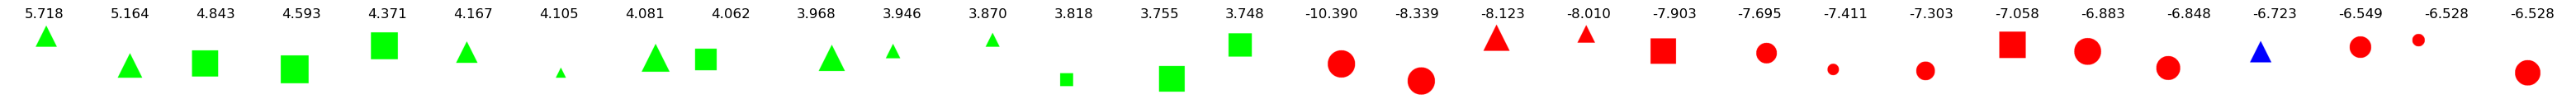

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. <pad>: 0.4524
	2. red: 0.3912
	3. four: 0.2642
	4. has: 0.2526
	5. is: 0.1396
	6. blue: 0.1046
	7. green: 0.1027
	8. color: 0.0980
	9. angle: 0.0747
	10. round: 0.0668

Top-n images with largest absolute values of logits:


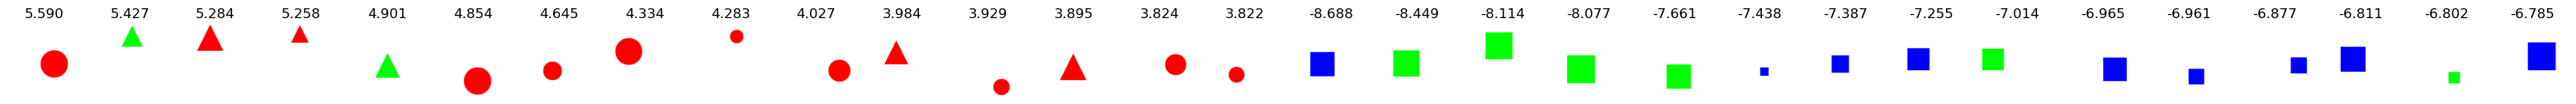

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. green: 0.4235
	2. four: 0.2836
	3. <pad>: 0.2783
	4. has: 0.2578
	5. three: 0.1769
	6. red: 0.1686
	7. angle: 0.1634
	8. is: 0.0773
	9. round: 0.0667
	10. blue: 0.0521

Top-n images with largest absolute values of logits:


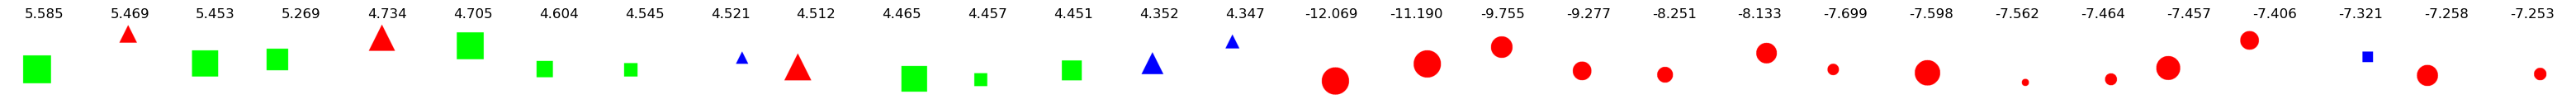

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. green: 0.4669
	2. <pad>: 0.4260
	3. four: 0.2428
	4. round: 0.2267
	5. red: 0.1529
	6. blue: 0.1457
	7. is: 0.1246
	8. three: 0.1120
	9. angle: 0.0874
	10. this: 0.0859

Top-n images with largest absolute values of logits:


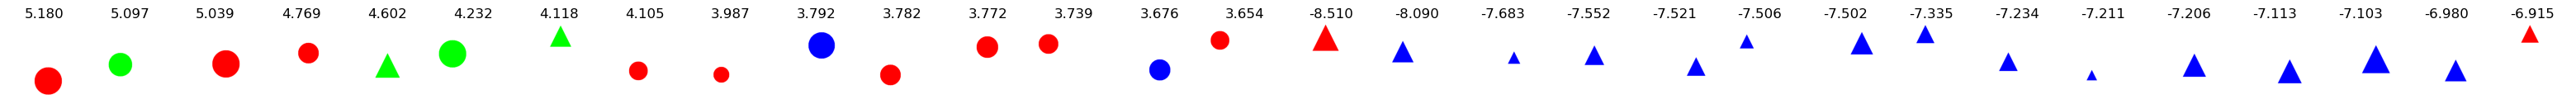

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)